This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False
fit_type = 1

Define a user funcion for fitting the data.

In [2]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [3]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [4]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [5]:

if use_errors == True:
    # create a list to hold the uncertainty in the density  
    density_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
else:
    density_uncertainty = [0.0]*len(density)
    
density_uncertainty = np.array(density_uncertainty)

Text(0, 0.5, 'Density (kg/m^3)')

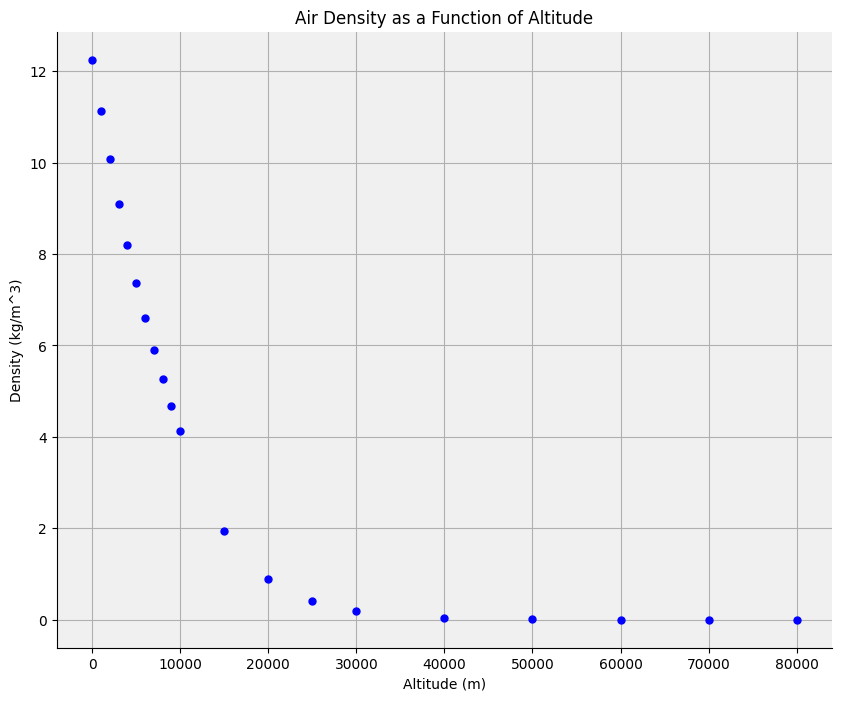

In [6]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, density, yerr=density_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
#plt.yscale("log")

Fit the data with the pre-defined function

In [7]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [12.0,-0.0001]
else:
    init_vals = [12.0,-0.0001, -0.000001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, density, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, density, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 1.25612159e+01 -1.11851582e-04]
[[ 2.00254124e-02 -2.53509026e-07]
 [-2.53509026e-07  6.46577915e-12]]


In [8]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 8.377E-01 / 18


Draw the graph

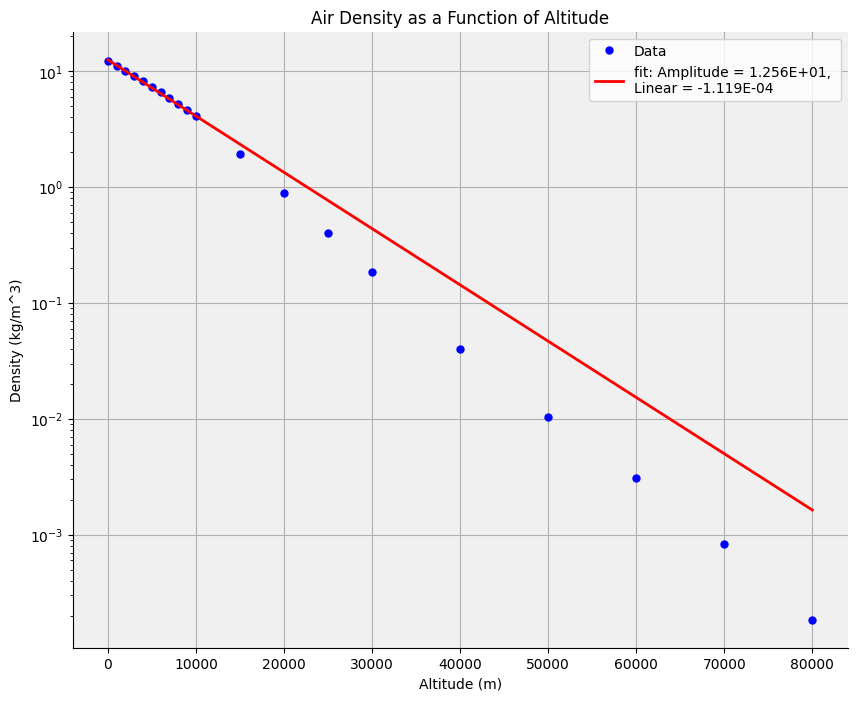

In [9]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
plt.yscale("log")
plt.legend()

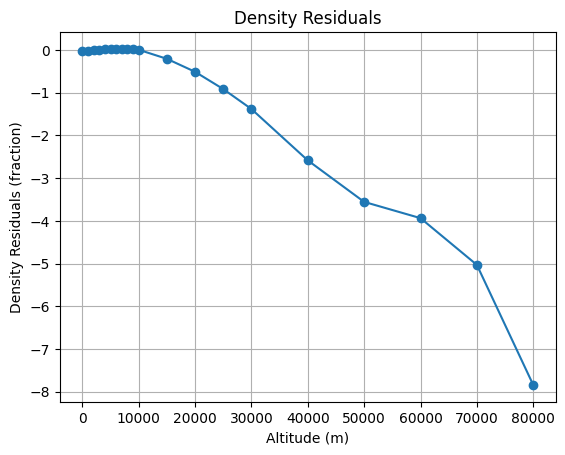

In [10]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (density - fitfunction(altitude, *popt))/density, 'o-')

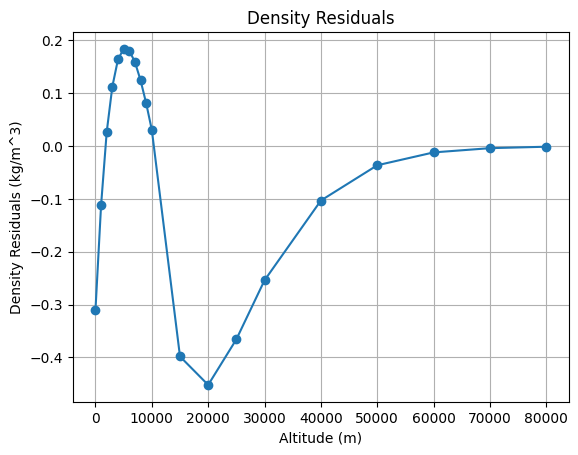

In [11]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (kg/m^3)')
plt.grid(True)

plt.plot(altitude, (density - fitfunction(altitude, *popt)), 'o-')
residuals = (density - fitfunction(altitude, *popt))
popt_exponential = popt

In [12]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)


In [13]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

In [14]:
print (popt, pcov)

[-3.35809924e-01  2.62643242e-04 -4.20314254e-08  2.53492594e-12
 -7.53755880e-17  1.19127800e-21 -9.60947958e-27  3.11524200e-32] [[ 8.68228743e-04 -4.17191404e-07  6.23816215e-11 -4.08028410e-15
   1.35090417e-19 -2.36665234e-24  2.09105351e-29 -7.33119546e-35]
 [-4.17191404e-07  3.15009300e-10 -5.62660013e-14  4.01522324e-18
  -1.39818603e-22  2.53059691e-27 -2.28698937e-32  8.15127769e-38]
 [ 6.23816215e-11 -5.62660013e-14  1.09397853e-17 -8.17018615e-22
   2.92702575e-26 -5.40171699e-31  4.95112936e-36 -1.78359973e-41]
 [-4.08028410e-15  4.01522324e-18 -8.17018615e-22  6.28055572e-26
  -2.29624831e-30  4.30201132e-35 -3.98902664e-40  1.45013227e-45]
 [ 1.35090417e-19 -1.39818603e-22  2.92702575e-26 -2.29624831e-30
   8.52599735e-35 -1.61666105e-39  1.51339250e-44 -5.54394527e-50]
 [-2.36665234e-24  2.53059691e-27 -5.40171699e-31  4.30201132e-35
  -1.61666105e-39  3.09515392e-44 -2.92013599e-49  1.07655328e-54]
 [ 2.09105351e-29 -2.28698937e-32  4.95112936e-36 -3.98902664e-40
   1.

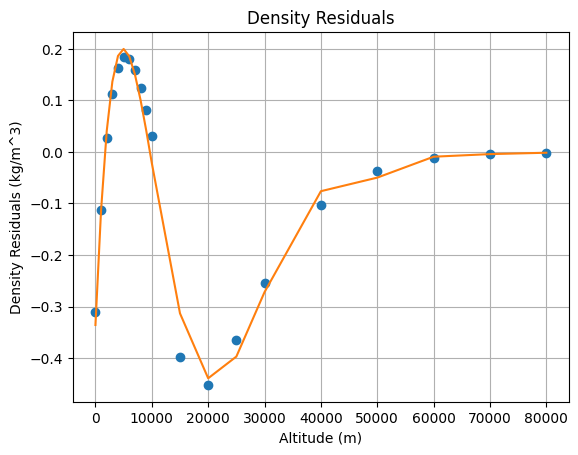

In [15]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (kg/m^3)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [16]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [17]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [18]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, density, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, density, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

In [19]:
print (popt, pcov)

[ 6.83301583e-01 -4.18379189e-04  1.15755855e+01 -9.30259151e-04
  9.30784831e-09  1.41338678e-12 -6.46067985e-17  1.20366377e-21
 -1.06140470e-26  3.64379598e-32] [[ 1.82948934e+00  5.75485883e-04 -1.83865976e+00  4.31357341e-04
  -4.06160305e-08  1.97276017e-12 -5.34715680e-17  8.13927647e-22
  -6.49045567e-27  2.10652966e-32]
 [ 5.75485883e-04  1.88590084e-07 -5.79921740e-04  1.34306560e-07
  -1.24813453e-11  5.99226083e-16 -1.60851302e-20  2.42908935e-25
  -1.92455994e-30  6.21352948e-36]
 [-1.83865976e+00 -5.79921740e-04  1.84891842e+00 -4.33584216e-04
   4.08111886e-08 -1.98167892e-12  5.37015775e-17 -8.17291117e-22
   6.51642340e-27 -2.11473973e-32]
 [ 4.31357341e-04  1.34306560e-07 -4.33584216e-04  1.02220605e-07
  -9.67724313e-12  4.72382173e-16 -1.28583931e-20  1.96415308e-25
  -1.57078216e-30  5.11016692e-36]
 [-4.06160305e-08 -1.24813453e-11  4.08111886e-08 -9.67724313e-12
   9.22325490e-16 -4.53095882e-20  1.24017217e-24 -1.90318401e-29
   1.52786932e-34 -4.98634120e-40]
 

Chi^2 / dof = 1.152E-02 / 10


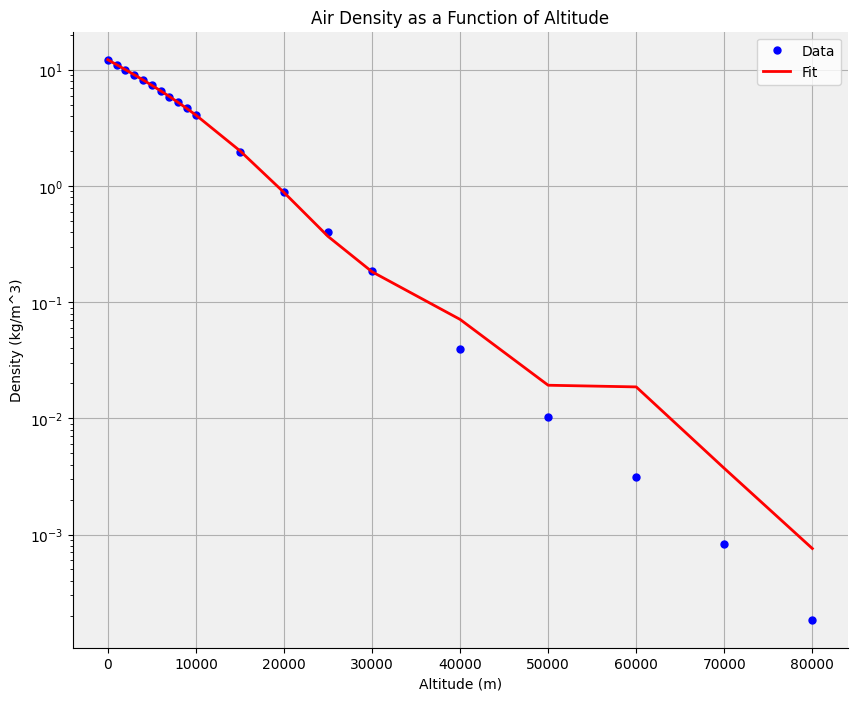

In [21]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
plt.yscale("log")
plt.legend()